In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

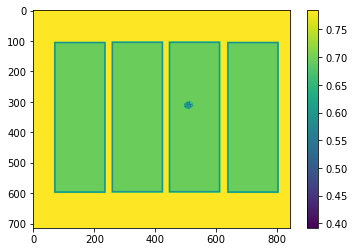

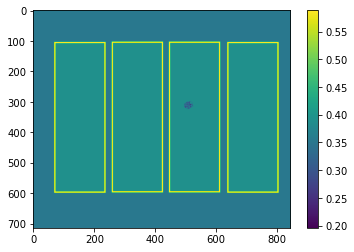

In [38]:
target_bs = np.asarray(Image.open("test_image.png"))
target_bs=target_bs[:,:,:2]

b1_map=target_bs[:,:,0]/255
b2_map=target_bs[:,:,1]/255
plt.imshow(b1_map)
plt.colorbar()
plt.show()
plt.close()
plt.imshow(b2_map)
plt.colorbar()
plt.show()
plt.close()


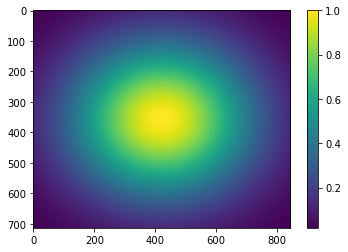

In [44]:
heat_data=np.ones_like(b1_map)*1.1
x0=heat_data.shape[0]/2
y0=heat_data.shape[1]/2
sig_x=heat_data.shape[0]/4
sig_y=heat_data.shape[1]/4
for x in range(heat_data.shape[0]):
    for y in range(heat_data.shape[1]):
        heat_data[x,y]=np.exp(-(((x-x0)**2)/(2*sig_x**2) + ((y-y0)**2)/(2*sig_y**2)))
#heat_data+=300
plt.imshow(heat_data)
plt.colorbar()

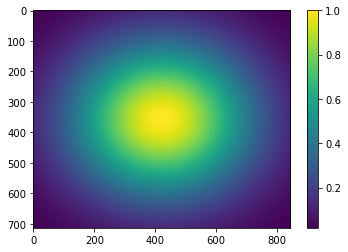

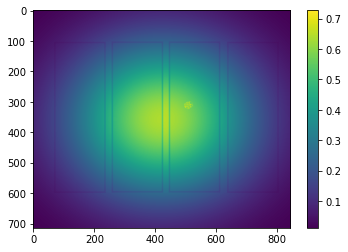

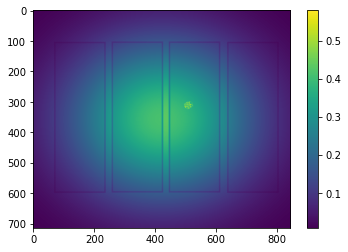

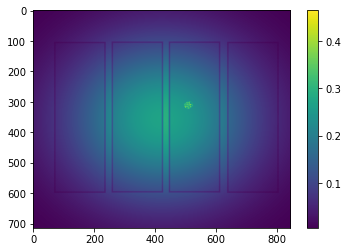

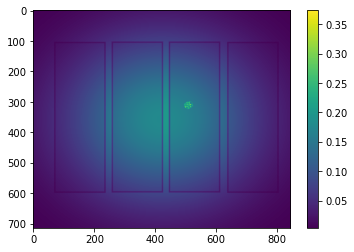

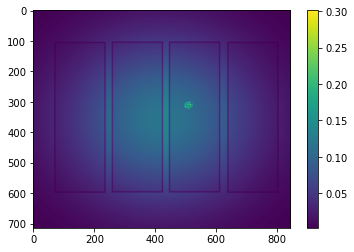

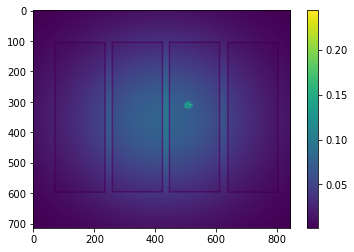

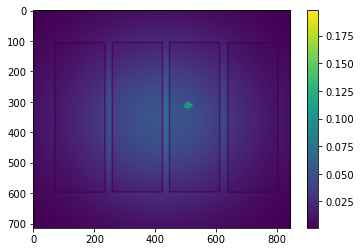

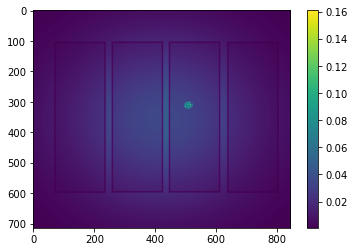

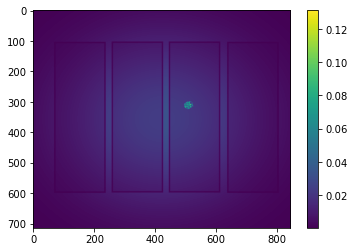

In [46]:
def biex(X,t):
    nX=X.copy()
    fac_map={}
    for x in range(heat_data.shape[0]):
        for y in range(heat_data.shape[1]):
            if b1_map[x,y] not in fac_map:
                fac_map[b1_map[x,y]]={}
            if b2_map[x,y] not in fac_map[b1_map[x,y]]:
                fac_map[b1_map[x,y]][b2_map[x,y]]=(0.2*np.exp(-b1_map[x,y]*t)+0.8*np.exp(-b2_map[x,y]*t))
            nX[x,y]=X[x,y]*fac_map[b1_map[x,y]][b2_map[x,y]]
    return nX
    
for i in range(10):
    plt.imshow(biex(heat_data,i))
    plt.colorbar()
    plt.show()
    plt.close()